In [ ]:
# As an example, let’s load an image and estimate the background and background noise using sigma-clipped statistics:

In [11]:
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from photutils.datasets import load_star_image
from photutils.detection import DAOStarFinder


In [19]:

hdu = load_star_image()  
data=fits.getdata('C:\\Users\\Observatory\\Exo\\tut\\data\\INO-ic-10\\combined\\light_minus_falt_onlyflat-r-2023_10_08-exp00.00.30.000-1x1_Merge_1.fit')
mean, median, std = sigma_clipped_stats(data, sigma=3.0)  
print((mean, median, std))

(288.2802756005248, 302.4435494210979, 58.73833327880022)


In [20]:
#Now we will subtract the background and use an instance of DAOStarFinder to find the stars in the image that have FWHMs of around 3 pixels and have peaks approximately 5-sigma above the background. Running this class on the data yields an astropy Table containing the results of the star finder:

In [21]:
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)  
sources = daofind(data - median)  
for col in sources.colnames:  
    if col not in ('id', 'npix'):
        sources[col].info.format = '%.2f'  # for consistent table output
sources.pprint(max_width=76) 

 id xcentroid ycentroid sharpness roundness1 ... sky    peak   flux  mag 
--- --------- --------- --------- ---------- ... ---- ------- ----- -----
  1   1041.89     13.11      0.72       0.24 ... 0.00  524.90  1.38 -0.35
  2   3972.16     29.51      0.83       0.31 ... 0.00  342.96  1.51 -0.45
  3   3721.81     59.42      0.94      -0.25 ... 0.00  388.49  1.36 -0.33
  4   1330.89     82.66      0.76       0.60 ... 0.00  557.76  1.59 -0.51
  5   3561.74    136.94      0.40      -0.26 ... 0.00  161.40  1.25 -0.24
  6   3746.73    156.76      0.68       0.07 ... 0.00  296.91  1.41 -0.38
  7   1036.40    229.79      0.56       0.36 ... 0.00  556.14  1.68 -0.56
  8    182.21    240.00      0.71       0.13 ... 0.00 2303.53  9.05 -2.39
  9    314.52    244.02      0.48       0.19 ... 0.00  112.42  1.02 -0.03
 10    476.30    257.51      0.69       0.06 ... 0.00  428.79  1.52 -0.46
...       ...       ...       ...        ... ...  ...     ...   ...   ...
225   3973.22   3936.32      0.62     

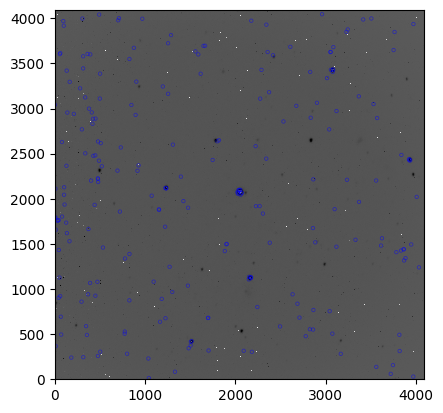

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=4.0)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(data, cmap='Greys', origin='lower', norm=norm,
           interpolation='nearest')
apertures.plot(color='blue', lw=2.5, alpha=0.5)